In [6]:
import pandas as pd

# read dataset
df = pd.read_csv('/Users/tianxinangelama/Documents/Studium/4. FS/DMS/DMS_data/GFP_AEQVI_Sarkisyan_2016.csv')

In [10]:
from AS_residues_in_out import split_m1_to_m15
from AS_residues_in_out import reduce_df_to_DMSscore_mutations

ImportError: cannot import name 'reduce_df_to_DMSscore_mutations' from 'AS_residues_in_out' (/Users/tianxinangelama/Documents/GitHub/topic02_team03/Epistasis Analysis/Structure_Analysis/AS_residues_in_out.py)

In [8]:
# split into multiple columns, 1 column for every mutation
# copy df
df_ind_col = df.copy()

# split
split_m1_to_m15(df_ind_col)

/Users/tianxinangelama/Documents/GitHub/topic02_team03/Epistasis Analysis/Structure_Analysis/AS_residues_in_out.py:4: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df['mutant'].str.split(':', 14, expand=True)


,mutant,mutated_sequence,DMS_score,DMS_score_bin,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,m14,m15
0,K3R:V55A:Q94R:A110T:D117G:M153K:D216A,MSRGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...,1.301030,0,K3R,V55A,Q94R,A110T,D117G,M153K,D216A,None,None,None,None,None,None,None,None
1,K3Q:V16A:I167T:L195Q,MSQGEELFTGVVPILAELDGDVNGHKFSVSGEGEGDATYGKLTLKF...,3.137350,1,K3Q,V16A,I167T,L195Q,None,None,None,None,None,None,None,None,None,None,None
2,K3Q:Y143C:N164D:S205P:A227T,MSQGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...,1.553913,0,K3Q,Y143C,N164D,S205P,A227T,None,None,None,None,None,None,None,None,None,None
3,K3Q:Y143N:V193A,MSQGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...,3.404237,1,K3Q,Y143N,V193A,None,None,None,None,None,None,None,None,None,None,None,None
4,K3R,MSRGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...,3.738586,1,K3R,None,None,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51709,Y237N,MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...,3.809468,1,Y237N,None,None,None,None,None,None,None,None,None,None,None,None,None,None
51710,Y237C,MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...,3.760217,1,Y237C,None,None,None,None,None,None,None,None,None,None,None,None,None,None
51711,Y237D,MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...,3.754101,1,Y237D,None,None,None,None,None,None,None,None,None,None,None,None,None,None
51712,Y237F,MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...,3.673173,1,Y237F,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [3]:
# df with single mutation mutants, only position and DMS_score
# copy df
df_single = df_ind_col.copy()

# remain rows with None in m2
df_single = df_single[df_single['m2'].isnull()]

# delete columns m2 to m15 and mutant, mutated_sequence, DMS_score_bin
df_single = df_single.drop(
    columns=['m2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12', 'm13', 'm14', 'm15', 'mutant',
             'mutated_sequence', 'DMS_score_bin'])

In [4]:
# df with double mutations mutants, only position and DMS_score
# copy df
df_double = df_ind_col.copy()

# remain rows with None in m3 and value in m2
df_double = df_double[df_double['m3'].isnull() & df_double['m2'].notnull()]

# delete columns m3 to m15 and mutant, mutated_sequence, DMS_score_bin
df_double = df_double.drop(
    columns=['m3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12', 'm13', 'm14', 'm15', 'mutant',
             'mutated_sequence', 'DMS_score_bin'])

In [5]:
# add new empty columns 'score_single_1' and 'score_single_2' to df_double_only_position_m1
df_double['score_single_1'] = ''
df_double['score_single_2'] = ''

print(df_double)

       DMS_score     m1     m2 score_single_1 score_single_2
13      3.716293    K3R  D133A                              
41      3.833353    K3N   S30Y                              
45      3.553744    K3N  V150A                              
53      3.688150    K3Q    E5V                              
56      3.619344    K3Q  K101R                              
...          ...    ...    ...            ...            ...
51688   3.577787  M233K  D234G                              
51691   3.744741  D234G  L236P                              
51694   3.865135  D234V  Y237H                              
51696   3.693903  D234G  E235V                              
51699   3.862731  E235G  L236P                              

[12777 rows x 5 columns]


In [6]:
# compare m1 from df_double with m1 from df_single, add value from DMS_score (df_single) to score_single_1 of df_double
for index, row in df_double.iterrows():
    for index2, row2 in df_single.iterrows():
        if row['m1'] == row2['m1']:
            df_double.loc[index, 'score_single_1'] = row2['DMS_score']

print(df_double)

       DMS_score     m1     m2 score_single_1 score_single_2
13      3.716293    K3R  D133A       3.738586               
41      3.833353    K3N   S30Y                              
45      3.553744    K3N  V150A                              
53      3.688150    K3Q    E5V       3.750487               
56      3.619344    K3Q  K101R       3.750487               
...          ...    ...    ...            ...            ...
51688   3.577787  M233K  D234G       3.684742               
51691   3.744741  D234G  L236P       3.706313               
51694   3.865135  D234V  Y237H       3.608266               
51696   3.693903  D234G  E235V       3.706313               
51699   3.862731  E235G  L236P       3.727375               

[12777 rows x 5 columns]


In [7]:
# compare m2 from df_double with m1 from df_single, add value from DMS_score (df_single) to score_single_2 of df_double
for index, row in df_double.iterrows():
    for index2, row2 in df_single.iterrows():
        if row['m2'] == row2['m1']:
            df_double.loc[index, 'score_single_2'] = row2['DMS_score']

print(df_double)

       DMS_score     m1     m2 score_single_1 score_single_2
13      3.716293    K3R  D133A       3.738586       3.540905
41      3.833353    K3N   S30Y                      3.752408
45      3.553744    K3N  V150A                       3.63642
53      3.688150    K3Q    E5V       3.750487       3.693551
56      3.619344    K3Q  K101R       3.750487       3.677711
...          ...    ...    ...            ...            ...
51688   3.577787  M233K  D234G       3.684742       3.706313
51691   3.744741  D234G  L236P       3.706313       3.706238
51694   3.865135  D234V  Y237H       3.608266       3.735417
51696   3.693903  D234G  E235V       3.706313       3.712191
51699   3.862731  E235G  L236P       3.727375       3.706238

[12777 rows x 5 columns]


In [8]:
# delete rows with empty values in score_single_1 or score_single_2
df_double = df_double[(df_double['score_single_1'] != '') & (df_double['score_single_2'] != '')]

print(df_double)

       DMS_score     m1     m2 score_single_1 score_single_2
13      3.716293    K3R  D133A       3.738586       3.540905
53      3.688150    K3Q    E5V       3.750487       3.693551
56      3.619344    K3Q  K101R       3.750487       3.677711
63      1.301030    K3Q  Q183L       3.750487       1.442357
73      3.970988    K3R   E34V       3.738586       3.758329
...          ...    ...    ...            ...            ...
51688   3.577787  M233K  D234G       3.684742       3.706313
51691   3.744741  D234G  L236P       3.706313       3.706238
51694   3.865135  D234V  Y237H       3.608266       3.735417
51696   3.693903  D234G  E235V       3.706313       3.712191
51699   3.862731  E235G  L236P       3.727375       3.706238

[11954 rows x 5 columns]


### assign in/out to each mutation

In [9]:
# import excel sheet (postion of mutation, in/out)
df_in_out = pd.read_excel('/Users/tianxinangelama/Documents/Studium/4. FS/DMS/AS_residues.xlsx', sheet_name='Sheet2')

In [10]:
# create a list with all positions with buried residues, these positions have value '1' in column 'in(1)/out(0)'
positions_in = df_in_out[df_in_out['in(1)/out(0)'] == 1]['position'].tolist()

In [11]:
# change data type of value from list positions_in to string
positions_in = [str(i) for i in positions_in]


In [12]:
# add columns 'position_m1' and 'position_m2' to df_double
df_double['position_m1'] = df_double['m1'].str[1:-1]
df_double['position_m2'] = df_double['m2'].str[1:-1]

In [13]:
# add empty columns 'm1_in/out' and 'm2_in/out' to df_double
df_double['m1_in/out'] = ''
df_double['m2_in/out'] = ''

In [14]:
# assign in/out to m1_in/out
for index, row in df_double.iterrows():
    if row['position_m1'] in positions_in:
        df_double.loc[index, 'm1_in/out'] = 'in'
    else:
        df_double.loc[index, 'm1_in/out'] = 'out'

In [15]:
# assign in/out to m2_in/out
for index, row in df_double.iterrows():
    if row['position_m2'] in positions_in:
        df_double.loc[index, 'm2_in/out'] = 'in'
    else:
        df_double.loc[index, 'm2_in/out'] = 'out'

In [16]:
print(df_double)

       DMS_score     m1     m2 score_single_1 score_single_2 position_m1  \
13      3.716293    K3R  D133A       3.738586       3.540905           3   
53      3.688150    K3Q    E5V       3.750487       3.693551           3   
56      3.619344    K3Q  K101R       3.750487       3.677711           3   
63      1.301030    K3Q  Q183L       3.750487       1.442357           3   
73      3.970988    K3R   E34V       3.738586       3.758329           3   
...          ...    ...    ...            ...            ...         ...   
51688   3.577787  M233K  D234G       3.684742       3.706313         233   
51691   3.744741  D234G  L236P       3.706313       3.706238         234   
51694   3.865135  D234V  Y237H       3.608266       3.735417         234   
51696   3.693903  D234G  E235V       3.706313       3.712191         234   
51699   3.862731  E235G  L236P       3.727375       3.706238         235   

      position_m2 m1_in/out m2_in/out  
13            133       out       out  
53     

### mean of both single mutations

In [17]:
# add empty column 'mean_single' to df_double
df_double['mean_single'] = ''

In [18]:
# calculate mean of both single mutations
for index, row in df_double.iterrows():
    df_double.loc[index, 'mean_single'] = (row['score_single_1'] + row['score_single_2']) / 2

print(df_double)

       DMS_score     m1     m2 score_single_1 score_single_2 position_m1  \
13      3.716293    K3R  D133A       3.738586       3.540905           3   
53      3.688150    K3Q    E5V       3.750487       3.693551           3   
56      3.619344    K3Q  K101R       3.750487       3.677711           3   
63      1.301030    K3Q  Q183L       3.750487       1.442357           3   
73      3.970988    K3R   E34V       3.738586       3.758329           3   
...          ...    ...    ...            ...            ...         ...   
51688   3.577787  M233K  D234G       3.684742       3.706313         233   
51691   3.744741  D234G  L236P       3.706313       3.706238         234   
51694   3.865135  D234V  Y237H       3.608266       3.735417         234   
51696   3.693903  D234G  E235V       3.706313       3.712191         234   
51699   3.862731  E235G  L236P       3.727375       3.706238         235   

      position_m2 m1_in/out m2_in/out mean_single  
13            133       out       o

### deviation between DMS_score of double mutant and mean of both single mutations

In [19]:
# add empty column 'deviation' to df_double
df_double['deviation'] = ''

In [20]:
# calculate deviation
for index, row in df_double.iterrows():
    df_double.loc[index, 'deviation'] = row['DMS_score'] - row['mean_single']

print(df_double)

       DMS_score     m1     m2 score_single_1 score_single_2 position_m1  \
13      3.716293    K3R  D133A       3.738586       3.540905           3   
53      3.688150    K3Q    E5V       3.750487       3.693551           3   
56      3.619344    K3Q  K101R       3.750487       3.677711           3   
63      1.301030    K3Q  Q183L       3.750487       1.442357           3   
73      3.970988    K3R   E34V       3.738586       3.758329           3   
...          ...    ...    ...            ...            ...         ...   
51688   3.577787  M233K  D234G       3.684742       3.706313         233   
51691   3.744741  D234G  L236P       3.706313       3.706238         234   
51694   3.865135  D234V  Y237H       3.608266       3.735417         234   
51696   3.693903  D234G  E235V       3.706313       3.712191         234   
51699   3.862731  E235G  L236P       3.727375       3.706238         235   

      position_m2 m1_in/out m2_in/out mean_single deviation  
13            133       o

In [22]:
# mean of all values from 'deviation'
mean_deviation = df_double['deviation'].mean()
print(mean_deviation)

-0.18170219943716273


In [23]:
# mean of all positive values from 'deviation'
mean_deviation_pos = df_double[df_double['deviation'] > 0]['deviation'].mean()
print(mean_deviation_pos)

0.07133422945087375


In [24]:
# mean of all negative values from 'deviation'
mean_deviation_neg = df_double[df_double['deviation'] < 0]['deviation'].mean()
print(mean_deviation_neg)

-0.2803046302245026


### add pair character to df_double

In [25]:
# add empty column 'pair' to df_double
df_double['pair'] = ''

In [26]:
# add pair character to df_double
# if m1_in/out = in and m2_in/out = in --> pair = 'in-in'
# if m1_in/out = in and m2_in/out = out --> pair = 'in-out'
# if m1_in/out = out and m2_in/out = in --> pair = 'in-out'
# if m1_in/out = out and m2_in/out = out --> pair = 'out-out'
for index, row in df_double.iterrows():
    if row['m1_in/out'] == 'in' and row['m2_in/out'] == 'in':
        df_double.loc[index, 'pair'] = 'in-in'
    elif row['m1_in/out'] == 'in' and row['m2_in/out'] == 'out':
        df_double.loc[index, 'pair'] = 'in-out'
    elif row['m1_in/out'] == 'out' and row['m2_in/out'] == 'in':
        df_double.loc[index, 'pair'] = 'in-out'
    else:
        df_double.loc[index, 'pair'] = 'out-out'

print(df_double)

       DMS_score     m1     m2 score_single_1 score_single_2 position_m1  \
13      3.716293    K3R  D133A       3.738586       3.540905           3   
53      3.688150    K3Q    E5V       3.750487       3.693551           3   
56      3.619344    K3Q  K101R       3.750487       3.677711           3   
63      1.301030    K3Q  Q183L       3.750487       1.442357           3   
73      3.970988    K3R   E34V       3.738586       3.758329           3   
...          ...    ...    ...            ...            ...         ...   
51688   3.577787  M233K  D234G       3.684742       3.706313         233   
51691   3.744741  D234G  L236P       3.706313       3.706238         234   
51694   3.865135  D234V  Y237H       3.608266       3.735417         234   
51696   3.693903  D234G  E235V       3.706313       3.712191         234   
51699   3.862731  E235G  L236P       3.727375       3.706238         235   

      position_m2 m1_in/out m2_in/out mean_single deviation     pair  
13            13

In [27]:
# count number of in-in, in-out and out-out
df_double['pair'].value_counts()

out-out    6673
in-out     4483
in-in       798
Name: pair, dtype: int64

### mean of deviation

In [28]:
# calculate mean of deviation for each pair
df_double.groupby('pair')['deviation'].mean()

pair
in-in     -0.616414
in-out    -0.266751
out-out   -0.072580
Name: deviation, dtype: float64

In [29]:
# calculate mean of all positive deviation for each pair
df_double[df_double['deviation'] > 0].groupby('pair')['deviation'].mean()

pair
in-in      0.102654
in-out     0.071290
out-out    0.069979
Name: deviation, dtype: float64

In [30]:
# calculate mean of all negative deviation for each pair
df_double[df_double['deviation'] < 0].groupby('pair')['deviation'].mean()

pair
in-in     -0.718256
in-out    -0.363556
out-out   -0.145343
Name: deviation, dtype: float64

### standard deviation

In [36]:
# calculate standard deviation for each pair
df_double.groupby('pair')['deviation'].std()

pair
in-in      0.669633
in-out     0.434137
out-out    0.201621
Name: deviation, dtype: float64

In [37]:
# calculate standard deviation for all positive deviation for each pair
df_double[df_double['deviation'] > 0].groupby('pair')['deviation'].std()

pair
in-in      0.130922
in-out     0.067305
out-out    0.059310
Name: deviation, dtype: float64

In [38]:
# calculate standard deviation for all negative deviation for each pair
df_double[df_double['deviation'] < 0].groupby('pair')['deviation'].std()

pair
in-in      0.652593
in-out     0.446162
out-out    0.209614
Name: deviation, dtype: float64

### box plots

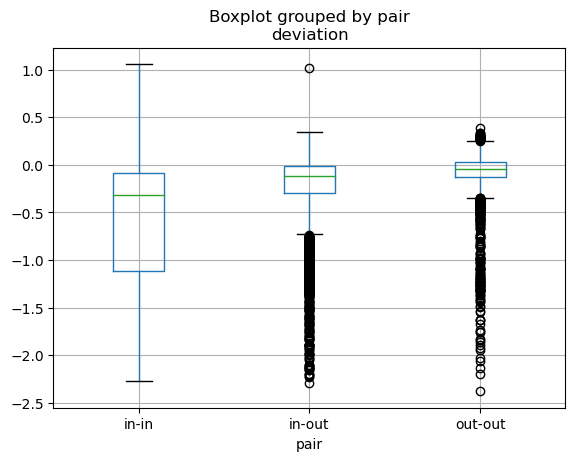

In [42]:
# create box plot for deviation for each pair
df_double.boxplot(column='deviation', by='pair')
plt.show()

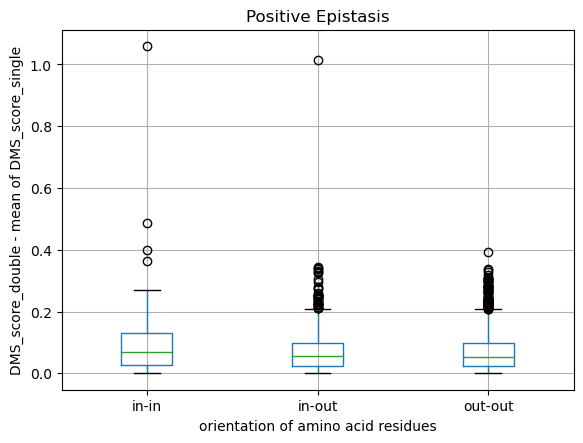

In [52]:
# create box plot for all positive deviation for each pair
df_double[df_double['deviation'] > 0].boxplot(column='deviation', by='pair')
# set title
plt.title('Positive Epistasis')
# set y-axis label
plt.ylabel('DMS_score_double - mean of DMS_score_single')
# set x-axis label
plt.xlabel('orientation of amino acid residues')
# delete 'Boxplot grouped by pair' from title
plt.suptitle('')
# save figure
plt.savefig('positive_epistasis.png')
plt.show()

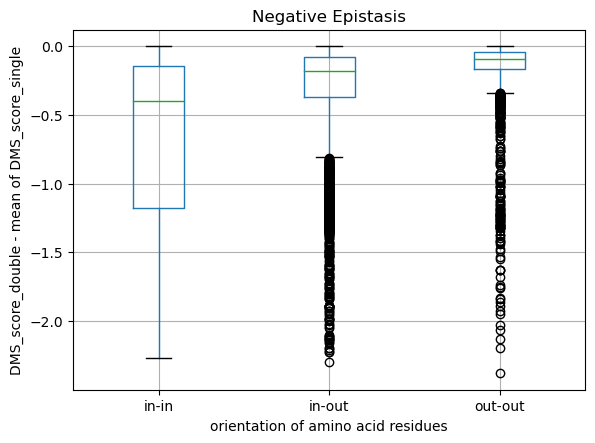

In [50]:
# create box plot for all negative deviation for each pair
df_double[df_double['deviation'] < 0].boxplot(column='deviation', by='pair')
# set title
plt.title('Negative Epistasis')
# set y-axis label
plt.ylabel('DMS_score_double - mean of DMS_score_single')
# set x-axis label
plt.xlabel('orientation of amino acid residues')
# delete 'Boxplot grouped by pair' from title
plt.suptitle('')
# save figure
plt.savefig('negative_epistasis.png')
plt.show()